# Harmony Search

let $\mathbb{X}^{t}$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(x) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(x) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem. Set $hcmr \sim U\left[0, 1\right]$ and $par \sim U\left[0, 1\right]$ where $U[0,1]$ is distributed uniformly. Set $\alpha \in [0, 1]$

1. Get $w^{t}$ the worst harmony as $\max_{x\in \mathbb{X}} f(x)$.

2. Set $I_1, I_2 \sim U[0,1]$ random numbers between 0 and 1.

3. <br>
&emsp; <b>IF</b> $I_1 \leq hcmr$ <b>THEN</b>: <br>
    &emsp;&emsp; $v_{i}^{t + 1} = U(\mathbb{X}_i^{t})$ where $U(\mathbb{X}_i^{t})$ is a uniform distributed random variable over the set of $i$-th variables from the population set $\mathbb{X}^{t + 1}$. <br>
    &emsp;&emsp; <b>IF</b> $I_2 \leq par$ <b>THEN</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1} + \alpha \cdot U[-1, 1]$ where $U[-1, 1]$ is a random variable between -1 and 1. <br>
    &emsp;&emsp; <b>ELSE</b>: <br>
        &emsp;&emsp;&emsp; $x_{i}^{t+1} = v_{i}^{t+1}$ <br>
    &emsp;&emsp; <b>ENDIF</b> <br>
&emsp; <b>ELSE</b>: <br>
    &emsp;&emsp; $x_{i}^{t+1} = U([x_i^{sup}, x_{i}^{inf}])$ where $U([x_i^{sup}, x_{i}^{inf}])$ is a random variable between the $x_{i}$ variable range. <br>
&emsp; <b>ENDIF</b> <br><br>
    
4. Select best harmony between $w^{t}$ and $x^{t+1}$ using DEB conditions. **If** $w^{t}$ is the best **then** $\mathbb{X}^{t+1} = \mathbb{X}^{t}$ **else** $\mathbb{X}^{t+1} = \mathbb{X}^{t}\cup \left\lbrace x^{t+1} \right\rbrace - \left\lbrace w^{t} \right\rbrace$.



In [1]:
from pyIpnHeuristic.benchmark import get_pg06

objective_function, g, h, ranges = get_pg06()

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

## Initialize Harmony

In [9]:
from pyIpnHeuristic.harmonySearch import HarmonySearch

population_size = 10

harmonySearch = HarmonySearch(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=population_size,
    hcmr=0.95,
    par=0.10,
    epsilon=10**-4,
    alpha=10**-2
)

harmonySearch.search(iterations=100000, save_history=True)

## Results

In [10]:
import pandas as pd

pd.DataFrame(
    sorted(harmonySearch.history, key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration
0,"[14.682547151635532, 2.4857512531403105]",-5269.806009,0.000000,0,100000
1,"[14.682547151635532, 2.4857512531403105]",-5269.806009,0.000000,0,99999
2,"[14.682547151635532, 2.4857512531403105]",-5269.806009,0.000000,0,99998
3,"[14.682547151635532, 2.4857512531403105]",-5269.806009,0.000000,0,99997
4,"[14.682547151635532, 2.4857512531403105]",-5269.806009,0.000000,0,99996
...,...,...,...,...,...
99995,"[14.136052406961046, 14.488670632666945]",-96.650102,73.420219,0,5
99996,"[14.136052406961046, 14.488670632666945]",-96.650102,73.420219,0,4
99997,"[14.136052406961046, 14.488670632666945]",-96.650102,73.420219,0,3
99998,"[14.136052406961046, 14.488670632666945]",-96.650102,73.420219,0,2


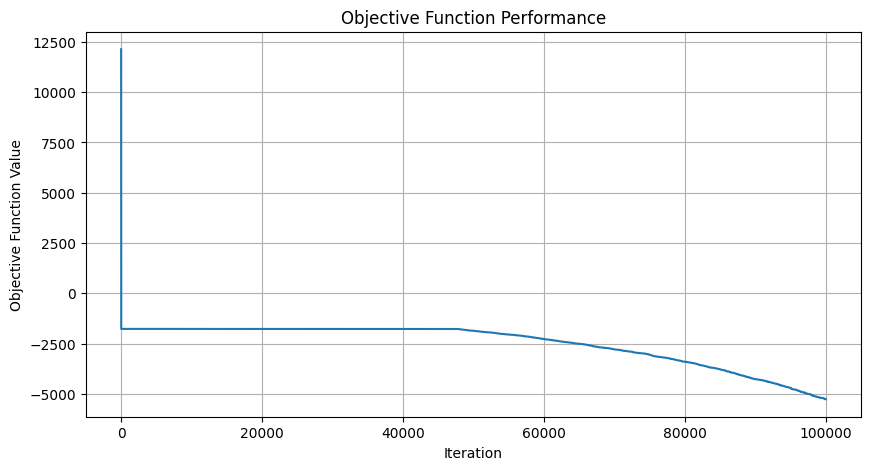

In [11]:
from _display import display_performance_results

display_performance_results(harmonySearch.history)